# Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# we decided to just first work with CIS-PD dataset.
cis = pd.read_csv('BEATPD_data/cis-pd/data_labels/CIS-PD_Training_Data_IDs_Labels.csv') # load CIS-PD label dataset
cis.dropna(subset=['on_off'], inplace = True) # remove rows with missing labels
cis.head()

,measurement_id,subject_id,on_off,dyskinesia,tremor
0,cc7b822c-e310-46f0-a8ea-98c95fdb67a1,1004,1.0,1.0,1.0
1,5163afe8-a6b0-4ea4-b2ba-9b4501dd5912,1004,0.0,0.0,0.0
2,5cf68c8e-0b7a-4b73-ad4f-015c7a20fb5a,1004,1.0,1.0,1.0
3,fb188ae2-2173-4137-9236-19a137a402c2,1004,3.0,3.0,3.0
4,19a3e9ea-fce1-40b7-9457-2618970beb7b,1004,1.0,1.0,1.0


In [3]:
demo = pd.read_csv('BEATPD_data/cis-pd/clinical_data/CIS-PD_Demographics.csv')
demo.head()

,subject_id,Age,Gender,Race,Ethnicity
0,1000,63,Male,White,Not Hispanic or Latino
1,1004,52,Male,White,Not Hispanic or Latino
2,1006,71,Male,White,Not Hispanic or Latino
3,1007,75,Male,White,Not Hispanic or Latino
4,1016,66,Female,White,Not Hispanic or Latino


In [4]:
%%time
# code to append general time series data information onto label table
for idx, row in cis.iterrows():
    
    # add patient demographics information (age, gender)
    age_gender = demo.loc[demo['subject_id'] == row['subject_id'], ["Age", "Gender"]]
    cis.loc[idx, "age"] = age_gender["Age"].values
    cis.loc[idx, "gender"] = age_gender["Gender"].values
    
    # aggregate time series data information
    timeseries = pd.read_csv(f"BEATPD_data/cis-pd/training_data/{row['measurement_id']}.csv")
    for coord in ['X', 'Y', 'Z']:
        avg = timeseries[coord].mean()
        std = timeseries[coord].std()
        max_val = timeseries[coord].max()
        min_val = timeseries[coord].min()
        range_val = abs(max_val - min_val)
        
        cis.loc[idx, f"avg_{coord}"] = avg
        cis.loc[idx, f"std_{coord}"] = std
        cis.loc[idx, f"min_{coord}"] = min_val
        cis.loc[idx, f"max_{coord}"] = max_val
        cis.loc[idx, f"range_{coord}"] = range_val
        
    print(f"Progress {idx*100/cis.shape[0]:.1f}%", end="\r")

CPU times: user 1min 15s, sys: 6.35 s, total: 1min 22s
Wall time: 1min 22s


In [5]:
cis.head()

,measurement_id,subject_id,on_off,dyskinesia,tremor,age,gender,avg_X,std_X,min_X,...,avg_Y,std_Y,min_Y,max_Y,range_Y,avg_Z,std_Z,min_Z,max_Z,range_Z
0,cc7b822c-e310-46f0-a8ea-98c95fdb67a1,1004,1.0,1.0,1.0,52.0,Male,-0.054452,0.373657,-5.364014,...,0.322197,0.407498,-2.715332,6.745605,9.460938,-0.698873,0.405944,-3.174072,3.780762,6.954834
1,5163afe8-a6b0-4ea4-b2ba-9b4501dd5912,1004,0.0,0.0,0.0,52.0,Male,-0.074134,0.292571,-7.002197,...,0.081874,0.285956,-2.013916,2.564453,4.578369,-0.823729,0.372116,-3.348389,3.831299,7.179688
2,5cf68c8e-0b7a-4b73-ad4f-015c7a20fb5a,1004,1.0,1.0,1.0,52.0,Male,-0.791880,0.197585,-5.188477,...,0.273321,0.394553,-2.027344,2.066406,4.093750,-0.197197,0.260382,-2.731445,3.489258,6.220703
3,fb188ae2-2173-4137-9236-19a137a402c2,1004,3.0,3.0,3.0,52.0,Male,0.423182,0.308817,-0.999512,...,0.654178,0.411343,-0.808105,3.498779,4.306885,-0.248452,0.289850,-2.674072,0.503174,3.177246
4,19a3e9ea-fce1-40b7-9457-2618970beb7b,1004,1.0,1.0,1.0,52.0,Male,0.524878,0.297208,-1.147949,...,0.509686,0.423765,-1.374756,4.460205,5.834961,-0.314112,0.342083,-4.423340,1.315185,5.738526


In [6]:
cis = cis.astype({'on_off': 'int', 'age': 'int'})

# convert gender into binary variable
cis = cis.rename(columns={"gender":"is_male"})
cis["is_male"] = cis["is_male"].apply(lambda x: 1 if x=="Male" else 0)

In [7]:
cis.head(5)

,measurement_id,subject_id,on_off,dyskinesia,tremor,age,is_male,avg_X,std_X,min_X,...,avg_Y,std_Y,min_Y,max_Y,range_Y,avg_Z,std_Z,min_Z,max_Z,range_Z
0,cc7b822c-e310-46f0-a8ea-98c95fdb67a1,1004,1,1.0,1.0,52,1,-0.054452,0.373657,-5.364014,...,0.322197,0.407498,-2.715332,6.745605,9.460938,-0.698873,0.405944,-3.174072,3.780762,6.954834
1,5163afe8-a6b0-4ea4-b2ba-9b4501dd5912,1004,0,0.0,0.0,52,1,-0.074134,0.292571,-7.002197,...,0.081874,0.285956,-2.013916,2.564453,4.578369,-0.823729,0.372116,-3.348389,3.831299,7.179688
2,5cf68c8e-0b7a-4b73-ad4f-015c7a20fb5a,1004,1,1.0,1.0,52,1,-0.791880,0.197585,-5.188477,...,0.273321,0.394553,-2.027344,2.066406,4.093750,-0.197197,0.260382,-2.731445,3.489258,6.220703
3,fb188ae2-2173-4137-9236-19a137a402c2,1004,3,3.0,3.0,52,1,0.423182,0.308817,-0.999512,...,0.654178,0.411343,-0.808105,3.498779,4.306885,-0.248452,0.289850,-2.674072,0.503174,3.177246
4,19a3e9ea-fce1-40b7-9457-2618970beb7b,1004,1,1.0,1.0,52,1,0.524878,0.297208,-1.147949,...,0.509686,0.423765,-1.374756,4.460205,5.834961,-0.314112,0.342083,-4.423340,1.315185,5.738526


In [8]:
# save as csv file
cis.to_csv("processed_data/cis_fe.csv")

In [7]:
# average time between peaks? # of times below local minima/maxima. How to define "peak"/"minimum (trough)"? 
# need to observe absolute value. 
## histogram of all values for theshold

## hmm need to think more about acceleration direction peak. should I think of it as absolute values?

In [36]:
abs_acc_list=[]
for i, filename in enumerate(cis.measurement_id):
    timeseries = pd.read_csv(f"BEATPD_data/cis-pd/training_data/{filename}.csv")
    timeseries['abs_acc'] = np.sqrt(timeseries['X']**2 + timeseries['Y']**2 + timeseries['Z']**2)
    
    abs_acc_list.append(timeseries['abs_acc'].values.tolist())
        
    print(f"Progress {i*100/cis.shape[0]:.1f}%", end="\r")

In [39]:
abs_acc_list = [item for sublist in abs_acc_list for item in sublist]

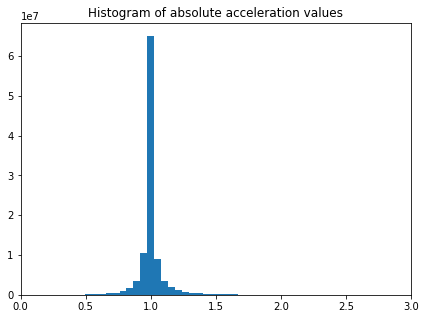

In [52]:
# visualize histogram of absolute acceleration values, to get threshold "peak"
plt.figure(figsize=(7,5))
plt.title("Histogram of absolute acceleration values")
plt.hist(abs_acc_list,bins=500)
plt.xlim(left=0, right=3)
plt.show()

In [ ]:
# EDA: group by negative vs. positive labels and check differences in feature values. 

In [ ]:
# rolling window? e.g. peak detection or mean in first 5 minutes, next 5 minutes, ...
# keep in one row? chop off to make more data points?
# try all three! : just overall, one row with 5min, multiple row

# CONFOUNDING FACTORS:
# when did they take medication? what disease state are they in?

# Limitations: 
# time of day is important, but our dataset doesn't provide information of time of day.
# Non-overlapping intervals, but not sure whether they are continuous blocks of time or separated apart.
# all whites

In [ ]:

"""reference from:
https://datascience.stackexchange.com/questions/46609/python-time-series-extracting-features-on-a-rolling-window-basis
https://datascience.stackexchange.com/questions/32280/time-series-feature-extraction-from-raw-sensor-data-for-classification
https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/
http://ataspinar.com/2018/04/04/machine-learning-with-signal-processing-techniques/
https://machinelearningmastery.com/basic-feature-engineering-time-series-data-python/
https://www.kdnuggets.com/2017/11/automated-feature-engineering-time-series-data.html
https://datascience.stackexchange.com/questions/62369/time-series-forecasting-dilemma-could-feature-engineering-overcome-time-depende
"""